# 0. Introdução

A análise abaixo foi feita utilizando dados dos funcionários da IBM que foram disponibilizado através do site: https://www.kaggle.com/datasets/rohitsahoo/employee/code 

Minha motivação é entender o perfil dos funcionários. Isso pode ser importante para previnir demissões, diminuir custos operacionais e melhorar a satisfação dos empregados, o que, conseguentemente, deve aumentar a produtividade da empresa.

Algumas das perguntas que tentarei responder com a análise:

- Existe uma disparidade salarial entre funcionários?
- Há alguma evidência de que gênero tenha impacto no atrito entre funcionários e empresa?
- Qual a relação entre salário e tempo de empresa?


<i><b>Nota: Forma de pensar na análise -> Analisar o dataset(estrutura) - Análise Univariada - Análise Bivariada</i></b>

# 1. Carregando Bibliotecas

In [122]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 2. Carregando Dataset

In [143]:
rh_ibm = pd.read_csv('conjunto de dados de funcionarios da ibm.csv')

# 3. Análise do dataset(Estrutura)

In [124]:
rh_ibm.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,3,80,0,16,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,1,80,1,1,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,3,80,0,4,2,2,0,0,0,0
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,...,3,80,1,1,2,3,1,0,0,0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,2,...,2,80,0,16,2,2,2,2,2,2


In [125]:
rh_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       412 non-null    int64 
 1   BusinessTravel            412 non-null    object
 2   DailyRate                 412 non-null    int64 
 3   Department                412 non-null    object
 4   DistanceFromHome          412 non-null    int64 
 5   Education                 412 non-null    int64 
 6   EducationField            412 non-null    object
 7   EmployeeCount             412 non-null    int64 
 8   EmployeeNumber            412 non-null    int64 
 9   EnvironmentSatisfaction   412 non-null    int64 
 10  Gender                    412 non-null    object
 11  HourlyRate                412 non-null    int64 
 12  JobInvolvement            412 non-null    int64 
 13  JobLevel                  412 non-null    int64 
 14  JobRole                   

In [126]:
rh_ibm.shape

(412, 34)

In [127]:
rh_ibm.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 4. Análise Univariada

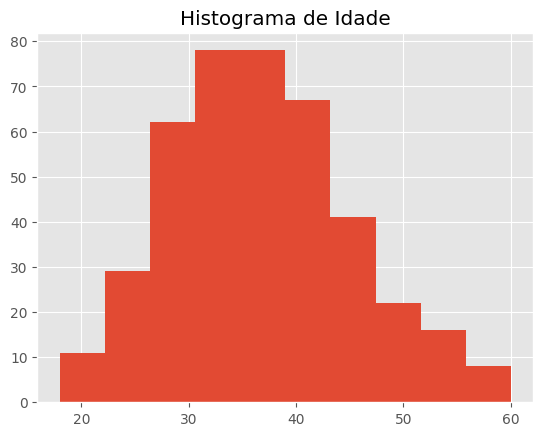

In [128]:
rh_ibm = plt.hist(rh_ibm.Age)
rh_ibm = plt.title('Histograma de Idade')

<b>Vemos que a maioria dos funcionários da IBM estão com a idade entre 30 e 40 anos.

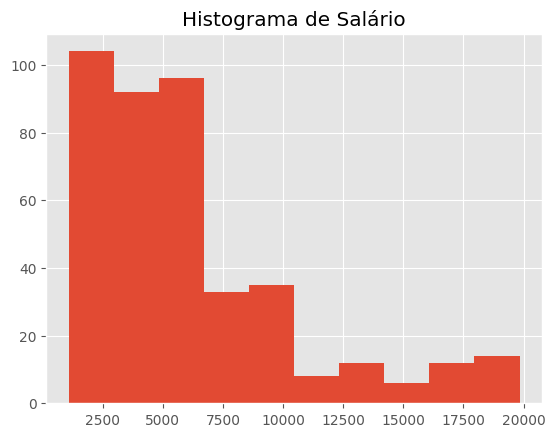

In [132]:
rh_ibm = plt.hist(rh_ibm.MonthlyIncome)
rh_ibm = plt.title('Histograma de Salário')

<b>Observamos que há uma disparidade salarial entre as pessoas. Muitas ganham salários entre 2500 e 6000, enquanto poucas ganham entre 12500 e 20000.</b>

In [135]:
rh_ibm.Gender.value_counts()

Gender
Male      262
Female    150
Name: count, dtype: int64

In [136]:
rh_ibm.Gender.value_counts(1)

Gender
Male      0.635922
Female    0.364078
Name: proportion, dtype: float64

<b>Vemos que a maioria dos funcionários são do sexo masculino.</b>

In [137]:
rh_ibm.EducationField.value_counts(1)

EducationField
Life Sciences       0.412621
Medical             0.325243
Marketing           0.089806
Technical Degree    0.087379
Other               0.055825
Human Resources     0.029126
Name: proportion, dtype: float64

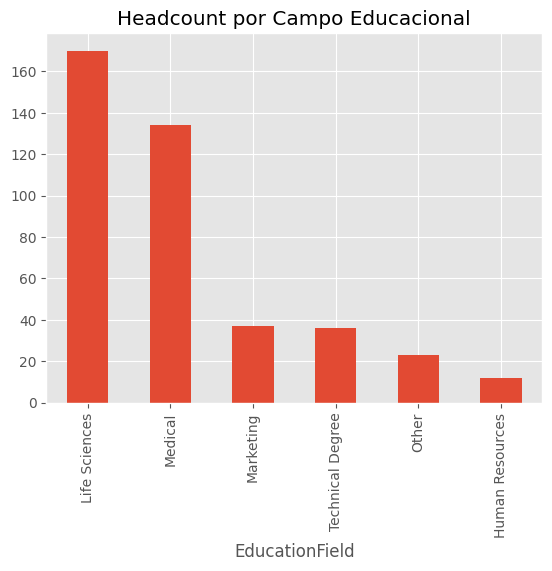

In [138]:
rh_ibm.EducationField.value_counts().plot.bar()
rh_ibm = plt.title('Headcount por Campo Educacional')

<b>Observamos que a maioria dos funcionários possui formação na área de Lifes Sciences. Em seguida, há um número significativo de funcionários na área Médical. A área com o menor número de funcionários formados é Human Resources.</b>

# 5. Análise Bivariada

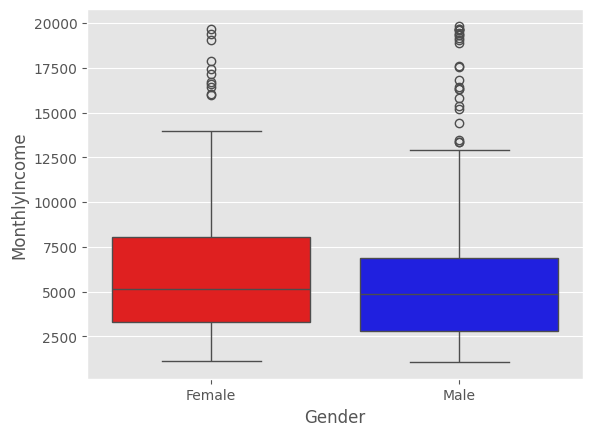

In [141]:
rh_ibm = sns.boxplot(x='Gender', y='MonthlyIncome', data=rh_ibm, hue='Gender', palette={'Male': 'blue', 'Female': 'red'}, legend=False)

<b> Curiosamente, a distribuição salarial entre homens e mulheres é bem parecida.</b>

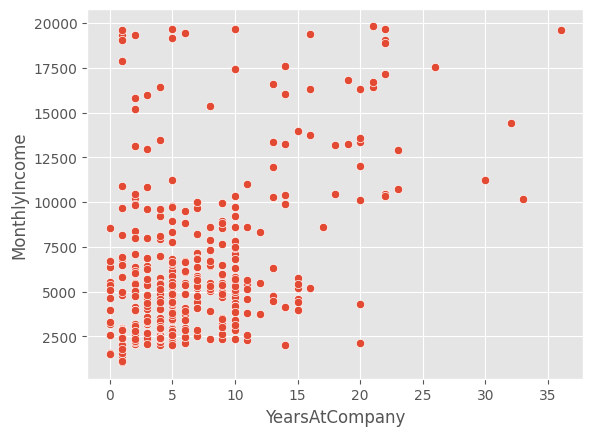

In [144]:
rh_ibm = sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', data= rh_ibm)

<b>É evidente que há um número significativo de funcionários que, apesar de terem pouco tempo de serviço na empresa, recebem um salário mensal superior a 7500.</b>